In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
#we can conclude that all the features are having the correct data types

In [6]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


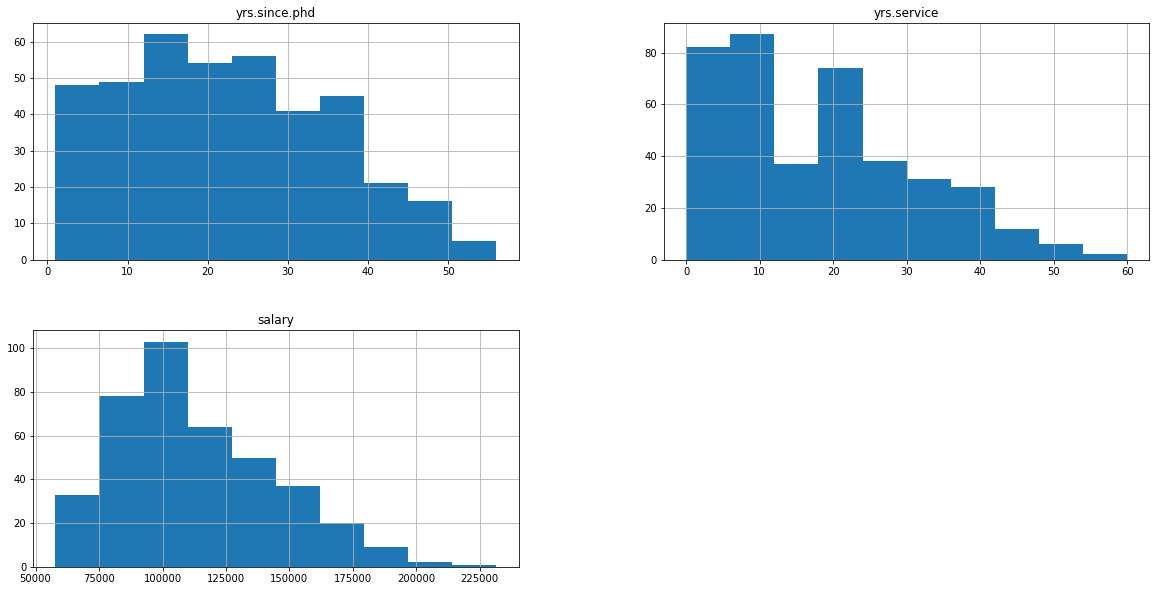

In [7]:
df.hist(figsize=(20,10));

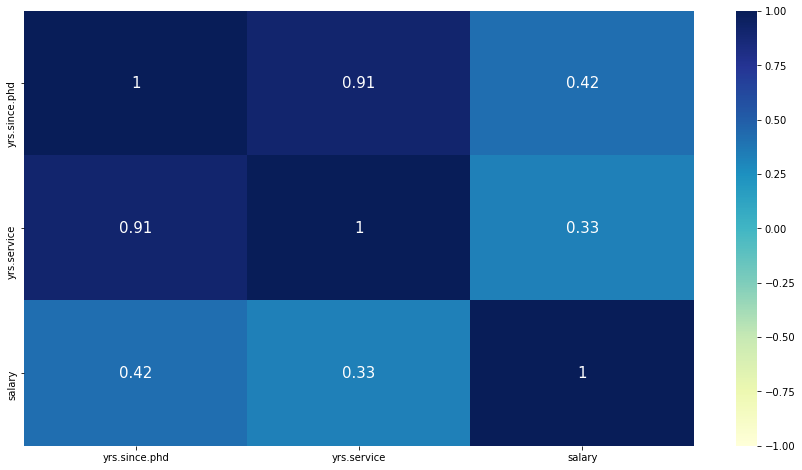

In [8]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.show()

In [9]:
#years in service is highly correlated with years since phd as most of them get into service as soon as they complete phd.

In [13]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [14]:
#There are 3 categories in rank features

In [15]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [16]:
#There are no null values in the data

In [17]:
data_cat=df.select_dtypes(include="object")

In [18]:
data_cat

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [19]:
data_cat1=pd.get_dummies(data_cat)
data_cat1

,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,0,0,1,0,1,0,1
1,0,0,1,0,1,0,1
2,0,1,0,0,1,0,1
3,0,0,1,0,1,0,1
4,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...
392,0,0,1,1,0,0,1
393,0,0,1,1,0,0,1
394,0,0,1,1,0,0,1
395,0,0,1,1,0,0,1


In [23]:
#dropping rank,decsipline,sex features from the original data
df=df.drop(['rank','discipline','sex'],axis=1)

In [24]:
data_new=pd.concat([df,data_cat1],axis=1)
data_new

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,19,18,139750,0,0,1,0,1,0,1
1,20,16,173200,0,0,1,0,1,0,1
2,4,3,79750,0,1,0,0,1,0,1
3,45,39,115000,0,0,1,0,1,0,1
4,40,41,141500,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
392,33,30,103106,0,0,1,1,0,0,1
393,31,19,150564,0,0,1,1,0,0,1
394,42,25,101738,0,0,1,1,0,0,1
395,25,15,95329,0,0,1,1,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [28]:
x=data_new.drop(['salary'],axis=1)
y=df['salary']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=50)

In [30]:
linmod= sm.OLS(y_train, X_train).fit()

In [31]:
linmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     37.73
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           3.92e-33
Time:                        19:03:49   Log-Likelihood:                -3171.9
No. Observations:                 277   AIC:                             6358.
Df Residuals:                     270   BIC:                             6383.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
yrs.since.phd    704.0347    299.191      2.353      0.019     114.990    1293.079
yrs.service     -521.0784    255.180     -2.042      0.042   -1023.474     -18.683
rank_AssocProf  1.596e+04   2790.972      5.717      0.000    1.05e+04    2.15e+04
rank_AsstProf   5218.1057   2893.391      1.803      0.072    -478.371    1.09e+04
rank_Prof       4.785e+04   3086.869     15.502      0.000    4.18e+04    5.39e+04
discipline_A    2.768e+04   2195.669     12.605      0.000    2.34e+04     3.2e+04
discipline_B    4.135e+04   1724.140     23.984      0.000     3.8e+04    4.47e+04
sex_Female      3.183e+04   3110.768     10.233      0.000    2.57e+04     3.8e+04
sex_Male         3.72e+04   2096.759     17.739      0.000    3.31e+04    4.13e+04
==============================================================================
Omnibus:                       37.187   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.938
Skew:                           0.736   Prob(JB):                     1.77e-15
Kurtosis:                       4.928   Cond. No.                     2.28e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled,y)
reg.score(X_scaled,y)

0.4546766222907247

In [37]:
linreg_pred= reg.predict(X_test)

In [39]:
linreg_pred

array([173338.56613227, 122582.86247228, 159882.37138879, 164611.29238936,
       173906.46826935, 148432.02662907, 275581.73075983, 144666.4194645 ,
       160116.21485349, 148221.06953186, 128868.08299851, 134130.83178989,
       220277.90869171, 131490.93880763, 131949.16041467, 183478.74210796,
       225263.55952448, 148960.00522552, 165946.86578195, 167824.93670305,
       155823.72697939, 212840.4356064 , 118468.71423071, 144666.4194645 ,
       169091.85099316, 148982.89159302, 258383.9131062 , 131553.74871575,
       134402.08055415, 202146.93170686, 172025.87910717, 223311.84829991,
       137592.83850035, 149231.25398978, 148175.29679687, 143446.37579631,
       146616.76561608, 115402.11921917, 234556.2171634 , 117647.96557549,
       186349.96031385, 245689.54042387, 152422.01193598, 146320.11224326,
       110233.37885767, 137826.68196505, 147858.27529763, 179420.09769856,
       116297.87325084, 147881.16166512, 140255.6178501 , 146382.92215138,
       147353.18306867, 1